# Decision Tree

## Decision Tree
- Greedy Heuristic 방법으로 데이터를 분할
    - 각 노드에서 가장 높은 Information Gain을 주는 특성을 선택
    - 어떤 특성의 Information Gain이 높다는 것은, 그 특성을 선택했을 때, 전체 학습 데이터의 불순도가 최대로 줄어드는 것을 의미
    - 군경험 여부로 가르면 남녀가 정확히 갈리는데, 이 때 불순도가 최대로 줄어드는 것이고, 따라서 군경험 특성이 Information Gain이 높다.
- 불순도
    - DecisionTreeClassifier의 criterion
        - 엔트로피
            - 0~1 이고 클수록 불순도 크다
        - 지니 불순도
            - 0~1 이고 클수록 불순도 크다
        - 편차제곱합
    - DecisionTreeRegressor의 criterion
        - Squared Error
        - Friedman MSE
        - Absolute Error
        - poisson
- 특성중요도 (feature_importance_)
- 장점
    - 해석이 용이하고 시각화가 용이
    - 스케일에 구애받지 않아 전처리 불필요
    - 모든 특성을 활용하기 때문에 과적합 우려. 
        - pre-prunning
            - 최대 깊이 : max_depth
            - leaf 최대개수 : max_leaf_nodes
            - 각 노드에서 분할할 데이터의 최소개수 : min_sample_split
        - post-prunning
            - 데이터 개수 적은 노드 삭제/병합
    - 학습 데이터 범위 밖으로 벗어나면 적용이 어렵다. 

    


In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

from sklearn.datasets import load_breast_cancer

plt.rcParams['font.size'] = 15
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['figure.figsize'] = (15,15)
plt.rcParams['axes.unicode_minus'] = False

cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

DecisionTrees score is 0.916


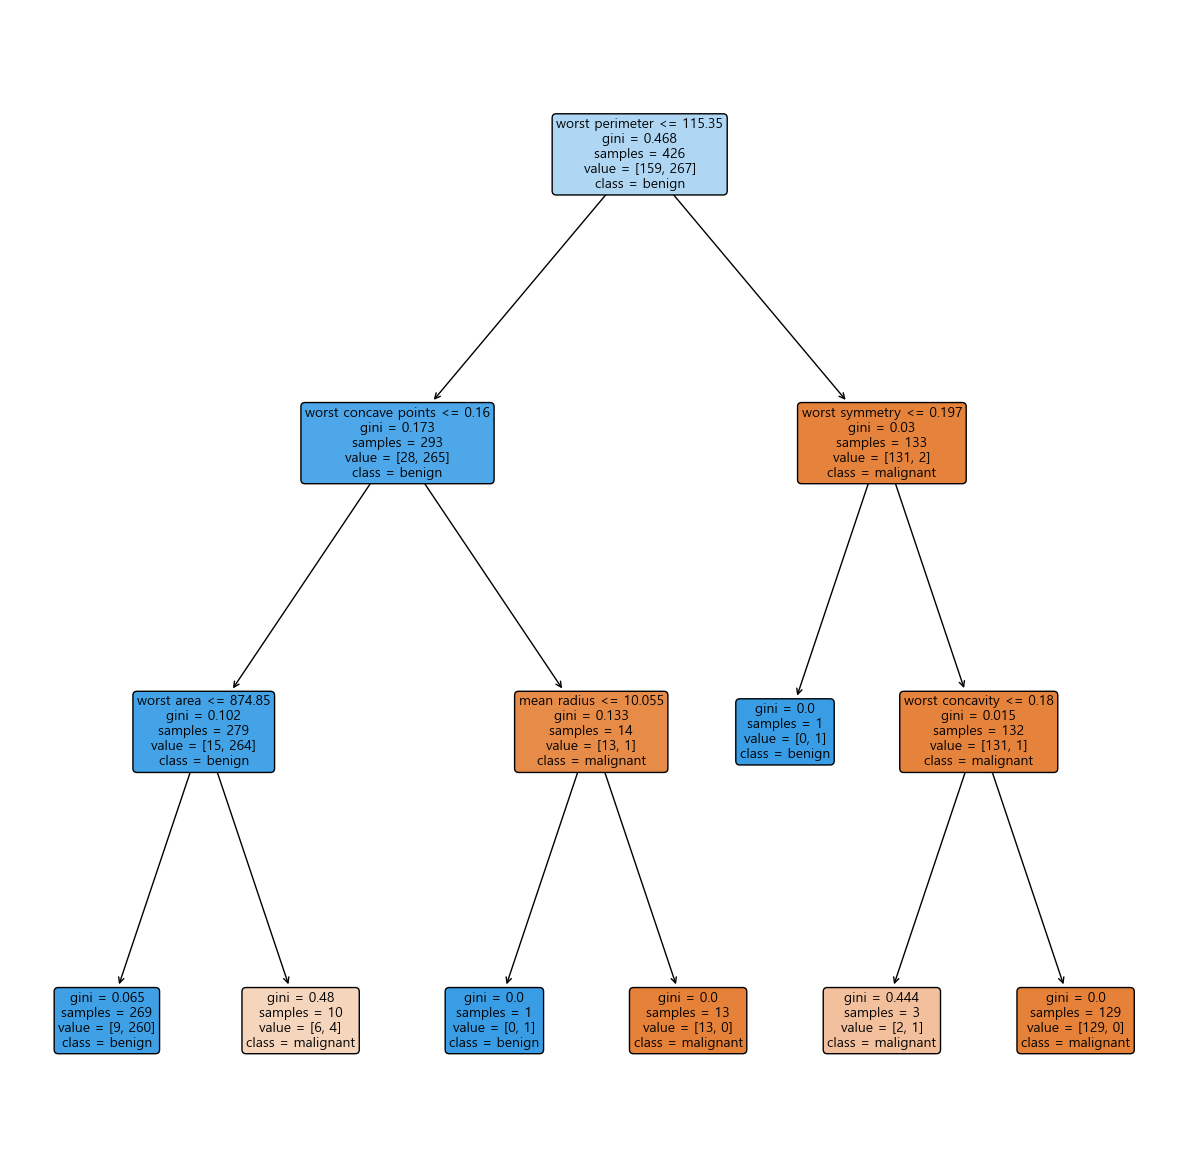

In [3]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=43)

tree = DecisionTreeClassifier(max_depth=3, criterion='gini')
tree.fit(X_train, y_train)

# MSE 성능
y_pred = tree.predict(X_test)
print('DecisionTree''s score is {:.3f}'.format(tree.score(X_test, y_test)))

# Visualization
plot_tree(tree, class_names=cancer.target_names.tolist(), feature_names=cancer.feature_names.tolist(), impurity=True, filled=True, rounded=True)
plt.show()

In [4]:
def plot_feat_importance(model, feat_names):
    plt.subplots(1,1, figsize=(6,8))
    fi = model.feature_importances_
    fn = feat_names
    plt.title('feature importnces')
    plt.barh(fn, fi)
    plt.show()

#plot_feat_importance(tree, cancer.feature_names)

## Ensemble
- voting (Bagging, Boosting, RandomForest)
    - 여러 모델(Weak learner)의 예측값을 바탕으로 voting하는 방식
    - hard-voting은 다수결 투표
    - soft-voting은 평균 또는 가중치합
- stacking
    - 여러 모델(Weak learner)의 예측값을 특성으로 잡고, 실제값을 타겟으로 하여 새로운 모델을 생성. 이 모델로 최종 예측값 생성

### Bagging
- 여러 개의 훈련 세트(Bootstrap sample)를 만들고 각각 학습
- 샘플링할 때 일반적으로 원본 데이터의 일부만 사용.
- 훈련 데이터로 포함되지 않는 데이터를 OOB(out of bag)

In [5]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

estimator = DecisionTreeClassifier(max_depth=3, min_samples_leaf=4)

# bagging 시 전체 샘플을 모두 사용하고, 전체 특성을 모두 사용하도록 설정
bagging = BaggingClassifier(estimator, n_estimators=50, oob_score=True, n_jobs=-1, random_state=0, max_samples=1.0, max_features=1.0)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=43)
bagging.fit(X_train, y_train)
bagging_pred = bagging.predict(X_test)
bagging_prob = bagging.predict_proba(X_test)[:,1]

print('train set accuracy: {:.3f}'.format(bagging.score(X_train, y_train)))
print('test set accuracy: {:.3f}'.format(bagging.score(X_test, y_test)))
print('OOB accuracy: {:.3f}'.format(bagging.oob_score_))

train set accuracy: 0.986
test set accuracy: 0.937
OOB accuracy: 0.955


### Boosting
- 특징 : 여러 개의 Weak Learner를 sequential하게 연결.
- 유형
    - Adaptive Boosting (AdaBoost)
        - 다음 모델로 넘어갈 때, 이전 모델 예측치 중 잔차가 큰 것들의 가중치를 높여서 학습
    - Gradient Boosting
        - 다음 모델로 넘어갈 때, 전체 데이터의 오차를 최적화하는 접근법 사용
        - 가중치 조정 대신, 모델이 유사 잔차를 학습하도록 함. 이 때 잔차를 Gradient로 보아 경사하강법 적용
        - GradientBoosting 계열, LightGBM 계열이 있다.
            - max_depth와 learning_rate로 제어
    - Stochastic Gradient Boosting
        - Gradient Boosting을 기본으로 하되, 각 모델마다 데이터와 예측변수를 샘플링하는 방식으로 랜덤요소 추가
        - XGBoost 계열
            - subsample로 샘플링 비율을 조정, eta로 모델 복잡성 제어

In [6]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(random_state=42, n_estimators=50)
ada.fit(X_train, y_train)

ada_pred = ada.predict(X_test)
ada_prob = ada.predict_proba(X_test)[:,1]

print('AdaBoost Score {:.3f}'.format(ada.score(X_test, y_test)))

#plot_feat_importance(ada, cancer.feature_names)

AdaBoost Score 0.965


In [7]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(random_state=0, n_estimators=50)
gbc.fit(X_train, y_train)

gbc_pred = gbc.predict(X_test)
gbc_prob = gbc.predict_proba(X_test)[:,1]

print('GradientBoosting Score {:.3f}'.format(gbc.score(X_test, y_test)))

#plot_feat_importance(gbc, cancer.feature_names)

GradientBoosting Score 0.944


In [8]:
from lightgbm import LGBMClassifier, plot_importance, plot_tree, create_tree_digraph

lgbm = LGBMClassifier(n_estimators=50)
lgbm.fit(X_train, y_train, eval_metric='logloss', eval_set=[(X_test, y_test)])

lgbm_pred = lgbm.predict(X_test)
lgbm_prob = lgbm.predict_proba(X_test)[:,1]

print('GradientBoosting Score {:.3f}'.format(gbc.score(X_test, y_test)))

#plot_feat_importance(lgbm, cancer.feature_names)

[LightGBM] [Info] Number of positive: 267, number of negative: 159
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000423 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4266
[LightGBM] [Info] Number of data points in the train set: 426, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.626761 -> initscore=0.518344
[LightGBM] [Info] Start training from score 0.518344
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [9]:
from xgboost import XGBClassifier

xg = XGBClassifier(objective='binary:logistic', n_estimators=50, eval_metric='logloss', random_state=0)
xg.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=False)

xg_pred = xg.predict(X_test)
xg_prob = xg.predict_proba(X_test)[:,1]

print('GradientBoosting Score {:.3f}'.format(gbc.score(X_test, y_test)))

#plot_feat_importance(lgbm, cancer.feature_names)

GradientBoosting Score 0.944


### RandomForest

- Bagging의 확장 형태
    - 모델 생성 시 부트스트랩 샘플링 및 특성을 무작위 선택하여 무작위성 주입
- 특성 수가 적어 Boosting보다 속도가 빠르고 계산비용이 적다.
- 결과에 대한 직관적 해석이 불가능


In [10]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=50, random_state=0)
rfc.fit(X_train, y_train)

rfc_pred = rfc.predict(X_test)
rfc_prob = rfc.predict_proba(X_test)[:,1]

print('GradientBoosting Score {:.3f}'.format(gbc.score(X_test, y_test)))

#plot_feat_importance(lgbm, cancer.feature_names)

GradientBoosting Score 0.944


### Stacking


In [11]:
titles = ['bagging', 'adaBoost', 'gBoost', 'lgbm', 'xgBoost', 'RandomForest']
preds = [bagging_pred, ada_pred, gbc_pred, lgbm_pred, xg_pred, rfc_pred]
probs = [bagging_prob, ada_prob, gbc_prob, lgbm_prob, xg_prob, rfc_prob]

probs_df = pd.DataFrame(probs).T
meta_learner = RandomForestClassifier(n_estimators=30, random_state=0, max_depth=3)
meta_learner.fit(probs_df, y_test)
meta_learner_pred = meta_learner.predict(probs_df)

from sklearn.metrics import accuracy_score

for title, pred in zip(titles, preds):
    score = accuracy_score(y_test, pred)
    print('{} score: {:.3f}'.format(title, score))

print('***** Stacking Score is {:.3f}'.format(accuracy_score(meta_learner_pred, y_test)))

bagging score: 0.937
adaBoost score: 0.965
gBoost score: 0.944
lgbm score: 0.951
xgBoost score: 0.958
RandomForest score: 0.937
***** Stacking Score is 0.979


## KNN
- 특징
    - 우선 분류된 데이터가 주어지고, 이후 테스트 데이터가 주어지면 가까운 k개의 데이터가 어느 class에 속했는지에 따라 classification
    - 따라서, k개가 너무 크면 과소적합, 너무 작으면 과대적합 가능성이 있다.
    - 거리를 계산하여 가장 가까운 k개의 데이터를 찾아야 하므로, 모든 예측변수들이 수치형이어야 한다.
    - 설명변수, 즉 특성의 척도 / 거리계산 방법 / k의 크기에 따라 예측 결과가 달라진다.
- 전처리
    - 특성의 척도로 인해 영향력이 왜곡되는 것을 방지하기 위해 변수 변환 필요
- 거리지표 선택
    - 가장 많이 사용되는 지표는 유클리드 거리, 맨해튼 거리
- k의 결정
    - 1에서 20사이의 홀수로 결정하며, 학습을 반복하며 성능비교하여 결정




In [12]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

X = load_iris().data
y = load_iris().target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=10)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3, weights='uniform', p=2)
knn.fit(X_train, y_train)

train_score = knn.score(X_train, y_train)
test_score = knn.score(X_test, y_test)

print('KNN Score {:.3f}'.format(test_score))

KNN Score 1.000


## SVM
- 비확률적 이진 선형분류 모델을 만든다.
    - 이진 클래스를 구분하면서 어떤 데이터도 포함되지 않는 경계를 찾는데, 
    - 이 때 이 경계로부터 데이터 간의 거리, 즉 마진(Margin)을 최대로 하는 경계를 결정 경계로 정한다.
    - 이 때 결정 경계와 마진을 결정하는 가장 가까운 데이터를 Support Vector라고 한다.
- 비선형 분류도 가능한데,
    - 이를 위해 PolynomialFeature와 같이 데이터에 비선형 특성을 추가하거나, 커널을 삽입한다.
    - 다항식 커널, 가우시안 커널(RFB, Radical basis function) 등이 존재한다.
- 최적화 속성
    - kernel : linear / poly / rbf / sigmoid / precomputed
    - gamma : 가우시안 커널 폭의 역수. 작은 gamma는 결정경계를 천천히 바꾸게 되며 모델의 복잡도를 낮춘다.
    - C : 규제. C가 증가하면 각 데이터들이 모델에 큰 영향을 주게 되어, 결정경계를 휘어지게 하고 분류가 정확해진다.
- 장단점
    - 저차원 / 고차원에 모두 잘 작동한다.
    - 대용량 데이터에서 잘 작동하지 않는다.
    - 전처리, 매개변수 설정에 신경을 만힝 써야 한다.
    - 결정경계 설명이 어려워, 모델 설명이 어렵다.

In [13]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

load = load_breast_cancer()
X = load.data
y = load.target

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3)

clf = SVC(C=0.1, kernel='rbf', gamma ='auto')
clf.fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)

print('Scale 전 스코어 : train {:.3f}, test {:.3f}'.format(train_score, test_score))

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
scaleX = ss.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(scaleX, y, stratify=y, test_size=0.3)

clf = SVC(C=0.1, kernel='rbf', gamma ='auto')
clf.fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)

print('Scale 후 스코어 : train {:.3f}, test {:.3f}'.format(train_score, test_score))


Scale 전 스코어 : train 0.628, test 0.626
Scale 후 스코어 : train 0.957, test 0.936


## Naive Bayes Classification

### Bayes 통계

- 조건부 확률
    - 표본 공간 내 두 사건 A, B
    - B가 일어난 상태에서 A가 일어날 확률 P(A|B) = P(A n B) / P(B) = P(B|A)P(A) / P(B)
- 전확률 정리
    - 표본공간의 분할인 A1, A2, A3 ... An은 서로 독립된 배반사건
    - P(B) = P(A1)P(B|A1) + P(A2)P(B|A2)+ ... +P(An)P(B|An)
- 베이즈 정리
    - P(Ak|B) = P(Ak)P(B|Ak) / ( i=1부터 n까지일 때 P(Ai)P(B|Ai)를 모두 합 )
    - P(Ak|B) : 사후 확률
    - P(B|Ak) : 우도(likelyhood) --> 결합확률
    - P(Ak) : 사전확률
    - P(B) : 확률 정규화
    - 베이즈 정리를 이용해 사전확률과 우도를 알면 사후확률을 구할 수 있다. 즉 베이즈 정리를 이용해 조건부 확률의 역을 구할 수 있다.
    - 따라서 조건부 확률을 알면 알고자하는 사후확률을 알아낼 수 있다.
- 마르코프 연쇄 몬테카를로
    - 사전분포로부터 랜덤샘플을 생성 --> 목표함수의 값을 근사화하는 과정을 통해 사후분포를 갱신(베이지안 추론)
    - 마르코프 연쇄 : 현재 상태가 이전 상태에만 영향을 받는 확률 과정
    - 몬테카를로 : 랜덤 샘플링을 통해 근사적으로 문제해결하는 방법

In [14]:
# 조건부 확률 구하기: 뽑힌 사람이 여자일 때, 그 사람이 안경을 썼을 확률은?
from pandas import DataFrame
table = pd.DataFrame([[18,5],[12,3]], index=['남자', '여자'], columns=['안경O', '안경X'])
table['성별_sum'] = table.sum(axis=1)
table.loc['안경_sum', :] = table.sum(axis=0)
print(table)
A = 15/38 #뽑힌 사람이 여자일 확률
B = 30/38 #뽑힌 사람이 안경을 쓸 확률은
A_B = 12/38 #뽑힌 사람이 여자이면서 안경을 쓸 확률
print("P(안경O|여자) = {:.2f}".format(A_B / A))

         안경O  안경X  성별_sum
남자      18.0  5.0    23.0
여자      12.0  3.0    15.0
안경_sum  30.0  8.0    38.0
P(안경O|여자) = 0.80


In [15]:
# 베이즈 정리를 통해 전확률과 사후확률 구하기
## B가 일어났을 때 A1이 일어날 확률은? P(A1|B)
from pandas import DataFrame #P(A1) + P(A2) = 1
a1, a2 = 0.7, 0.3 #P(A1), P(A2)
b_a1, b_a2 = 0.2, 0.9 #P(B|A1), P(B|A2)
b = a1*b_a1 + a2*b_a2 #P(B) 전확률 정리
table1 = pd.DataFrame({"사건":['A1', 'A2'], 
                  '사전확률_P(Ai)':[a1, a2], 
                  '조건부확률_P(B|Ai)':[b_a1, b_a2], 
                  '결합확률_P(Ai*B)':[a1*b_a1, a2*b_a2], 
                  '사후확률_P(Ai|B)':[ a1*b_a1/b, a2*b_a2/b]})
print("P(B)={:.3f}".format(b))
print("P(A1|B)={:.3f}".format(table1.query('사건=="A1"')['사후확률_P(Ai|B)'].values[0]))
print(table1.round(3))

P(B)=0.410
P(A1|B)=0.341
   사건  사전확률_P(Ai)  조건부확률_P(B|Ai)  결합확률_P(Ai*B)  사후확률_P(Ai|B)
0  A1         0.7            0.2          0.14         0.341
1  A2         0.3            0.9          0.27         0.659


### Naive Bayes 분류
- 기본개념
    - 확률변수 X(=X1, X2, X3... Xn), Y에 대한 조건부 확률은 P(X1=x1, X2=x2,... Xn=xn | Y=y)
    - 확률변수 X1, X2, ...,X3가 서로 독립이라 가정한다면, P(X1=x1|Y=y)*P(X2=x2|Y=y)* ... *P(Xn=xn|Y=y)도 성립하므로,
    - 이 것을 계산하여 Y의 범주를 판정하는 것.
    - 여기서 X1, X2 ... Xn이 서로 독립일거라는 Naive한 가정이 필요하기에 Naive Bayes 분류
- 절차
    1. 훈련 데이터로 각 클래스에서 각 예측변수가 나타날 조건부 확률과 각 클래스의 사전확률을 계산
    2. 1을 활용하여 새로운 데이터에 대해 각 클래스에 대한 조건부 확률과 사후 확률을 계산
    3. 가장 높은 사후확률을 가지는 클래스로 분류한다.
- sklearn에서 제공하는 Bayesian 분류기
    - GaussianNB : 예측변수가 연속형. 예측변수들의 우도가 가우시안 분포를 따른다.
    - BernoulliNB : 예측변수가 이항변수
    - MultinomialNB : 예측변수가 빈도 데이터
    - CategoricalNB : 예측변수가 범주형
    - CompletementNB : MultinomialNB 알고리즘을 개선. 불균형데이터셋에서 잘 동작하도록 함.

feature 확인:  [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
target 확인:  0
Train score 0.870, Test score 0.849
예측한 숫자: [0] 
실제 숫자:


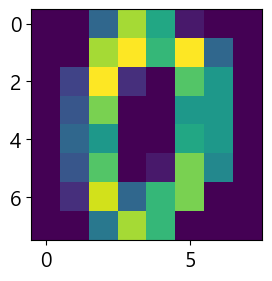

In [16]:
# GaussianNB
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
X = load_digits().data
y = load_digits().target
idx = 0
print("feature 확인: ", X[idx])
print("target 확인: ", y[idx])

X_train, X_test, y_train, y_test = train_test_split(X, y)
GNB = GaussianNB()
GNB.fit(X_train, y_train)
train_score = GNB.score(X_train, y_train)
test_score = GNB.score(X_test, y_test)
print("Train score {:.3f}, Test score {:.3f}".format(train_score, test_score))

#실제 숫자 이미지와 예측한 숫자 확인하기
pred = GNB.predict(X[idx].reshape(-1,len(X[idx])))
print("예측한 숫자: {} \n실제 숫자:".format(pred))
plt.rcParams['figure.figsize'] = (3,3)
plt.imshow(X[idx].reshape(8,8))
plt.show()

In [33]:
emails = pd.read_csv("https://raw.githubusercontent.com/algoboni/pythoncodebook1-1/main/9-4_spam.csv").sample(300).reset_index(drop=True)

#dtm(document term matrix)은 각 단어를 feature로, 문장 내 단어출현빈도를 값으로 가짐
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
Xv = cv.fit_transform(emails['email_title'])

dtm = pd.DataFrame(Xv.toarray(), columns=cv.get_feature_names_out())

# 각 단어출현빈도를 feature로, spam 여부를 target으로 함.
X = dtm
y = emails['spam']
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state=0)

# 베이지안 분류기 (스팸여부 이므로 BernoulliNB)
from sklearn.naive_bayes import BernoulliNB
BNB = BernoulliNB(binarize=0)   #예측변수가 이진변수가 아닌 경우, 이진화하여 학습한다.
BNB.fit(X_train, y_train)

train_score = BNB.score(X_train, y_train)
test_score = BNB.score(X_test, y_test)
print('Train score {:.3f}, Test score {:.3f}'.format(train_score, test_score))

idx = 0
pred = BNB.predict(X.iloc[idx,:].values.reshape(-1, X.shape[1]))
print('예측 스팸여부: {}, 실제 스팸여부: {}'.format(pred, y[idx]))

#각 클래스의 사전확률
print('각 클래스위 사전확률 : False: {:.3f}, True: {:.3f}'.format(BNB.class_log_prior_[0], BNB.class_log_prior_[1]))

#각 feature의 각 class의 사후확률 (각 클래스별 단어 중요로도 볼 수 있음)
result = pd.DataFrame(BNB.feature_log_prob_, columns=cv.get_feature_names_out(), index=['False', 'True'])
print('각 feature의 각 class에 대한 사후확률: \n', result.iloc[:, 2000:2010])

# .feature_log_prob는 각 class일 때 해당 feature인 단어가 나올 로그 확률을 의미한다.
# 이 확률이 높을 수록, 해당 class일 때 해당 feature의 단어가 나올 확률이 높다는 의미다.
# 따라서, False에 대한 확률값이 낮을수록, True에 대한 확률값이 높을수록 spam일 확률이 높다.

Train score 0.791, Test score 0.760
예측 스팸여부: [0], 실제 스팸여부: 0
각 클래스위 사전확률 : False: -0.354, True: -1.211
각 feature의 각 class에 대한 사후확률: 
        celebration      cell  cellpadding     cells  cellspacing  cellular  \
False    -4.382027 -4.382027    -5.075174 -4.382027    -5.075174 -5.075174   
True     -4.234107 -4.234107    -4.234107 -3.540959    -4.234107 -3.540959   

       cemetery    center   centera  centerfont  
False -5.075174 -3.465736 -5.075174   -5.075174  
True  -3.540959 -4.234107 -4.234107   -4.234107  


c:\Users\lsel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(


In [31]:
X.columns

Index(['00', '000', '0000', '000000', '000080', '001', '002', '003', '004',
       '005',
       ...
       'zivley', 'zjvincbmvqq', 'zn', 'zone', 'zonedubai', 'zu', 'zuk', 'zur',
       'zustellung', 'zyban'],
      dtype='object', length=7565)

## ANN


### 다층 퍼셉트론